# County Residence Interface

County residents upon logging in, are provided with an interface where they are able to select their county of 

residence from a predefined list which we are going to fetch from an API that contains the list of the 47 counties.

The application utilises natural language processing techniques to analyse the input from residents and extract 

relevant information.This includes data preprocessing tasks such as tokenization and lemmatization.Word frequency 

analysis and sentiment analysis is carried out on the preprocessed data.From the analysed data, a pie chart will be 

constructed to visualise the distribution of the services. Each category of the service improvement will be 

represented by the segments of the pie-chart

## Training Data 

OCHA SERVICES DATA: This dataset is a detailed dataset containing data regarding the many different services and 

amenities available in Kenya, and the date when they were recorded. We will use this data in training our model to 

identify the specific service or amenity a resident wants improved. Below is the link to the dataset:

In [15]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt




In [16]:
ocha_dataset=pd.read_csv("infrastructure_ken.csv")
ocha_dataset.head(10)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Kenya,KEN,2021,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,973328921.924682
2,Kenya,KEN,2020,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,567129881.228679
3,Kenya,KEN,2019,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,628827610.941533
4,Kenya,KEN,2018,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,570245522.266492
5,Kenya,KEN,2017,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,473090014.312925
6,Kenya,KEN,2016,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,451360165.698429
7,Kenya,KEN,2015,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,550307434.561937
8,Kenya,KEN,2014,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,755711724.114998
9,Kenya,KEN,2013,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,515175648.649776


In [17]:
ocha_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    1340 non-null   object
 1   Country ISO3    1340 non-null   object
 2   Year            1340 non-null   object
 3   Indicator Name  1340 non-null   object
 4   Indicator Code  1340 non-null   object
 5   Value           1340 non-null   object
dtypes: object(6)
memory usage: 62.9+ KB


In [18]:
ocha_dataset.columns

Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')

In [19]:
year_counts=ocha_dataset['Year'].value_counts()
year_counts

Year
2009          45
2008          44
2004          42
2007          42
2010          41
              ..
1961           2
1960           2
1963           2
1964           2
#date+year     1
Name: count, Length: 64, dtype: int64

In [20]:
# Get the most common service across all years
most_common_activity = ocha_dataset['Indicator Name'].mode()[0]
most_common_activity

'Renewable internal freshwater resources per capita (cubic meters)'

In [21]:
# Group the data by 'Year' and find the most common services for each year
most_common_activities = ocha_dataset.groupby('Year')['Indicator Name'].agg(lambda x: x.mode().iloc[0]).reset_index()
most_common_activities.head(10)

,Year,Indicator Name
0,#date+year,#indicator+name
1,1960,Mobile cellular subscriptions
2,1961,Renewable internal freshwater resources per ca...
3,1962,Renewable internal freshwater resources per ca...
4,1963,Renewable internal freshwater resources per ca...
5,1964,Renewable internal freshwater resources per ca...
6,1965,Fixed telephone subscriptions
7,1966,Fixed telephone subscriptions
8,1967,Fixed telephone subscriptions
9,1968,Fixed telephone subscriptions


In [22]:
most_common_activities.tail(10)

,Year,Indicator Name
54,2013,"Air transport, freight (million ton-km)"
55,2014,"Air transport, freight (million ton-km)"
56,2015,"Air transport, freight (million ton-km)"
57,2016,"Air transport, freight (million ton-km)"
58,2017,"Air transport, freight (million ton-km)"
59,2018,"Air transport, freight (million ton-km)"
60,2019,"Air transport, freight (million ton-km)"
61,2020,"Air transport, freight (million ton-km)"
62,2021,"Air transport, freight (million ton-km)"
63,2022,Fixed broadband subscriptions


Plotting  Graph for the most common services provided in the last 10 years

c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

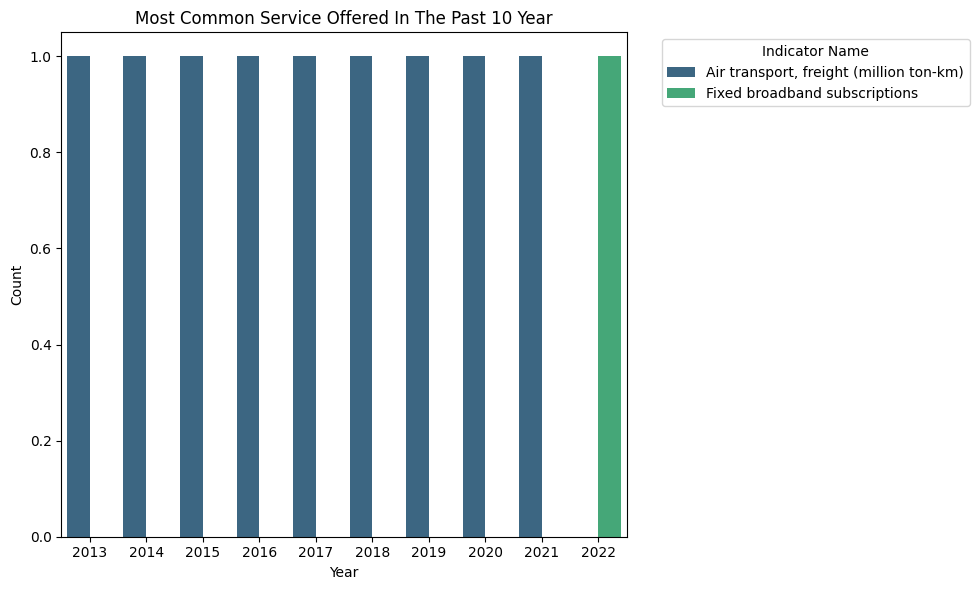

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=most_common_activities.tail(10), x='Year', hue='Indicator Name', palette='viridis', dodge=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Most Common Service Offered In The Past 10 Year')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Dropping Unnecessary Columns

In [24]:
services=ocha_dataset.drop(['Country Name', 'Country ISO3', 'Year','Indicator Code', 'Value'], axis=1)
services

,Indicator Name
0,#indicator+name
1,"ICT service exports (BoP, current US$)"
2,"ICT service exports (BoP, current US$)"
3,"ICT service exports (BoP, current US$)"
4,"ICT service exports (BoP, current US$)"
...,...
1335,Personal computers (per 100 people)
1336,Personal computers (per 100 people)
1337,Personal computers (per 100 people)
1338,Personal computers (per 100 people)


In [31]:
services.columns

Index(['Indicator Name'], dtype='object')

Natural Language Processing

Text Pre-Processing:Cleaning text

In [25]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora


In [26]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
def pre_process(text):
    # Tokenization: Split the text into sentences and the sentences into words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]

    # Lowercase the words and remove punctuation
    words = [[word.lower() for word in sentence if word.isalnum()] for sentence in words]

    # Remove words with fewer than 3 characters
    words = [[word for word in sentence if len(word) > 2] for sentence in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [[word for word in sentence if word not in stop_words] for sentence in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in words]

    # Stemming
    stemmer = PorterStemmer()
    words = [[stemmer.stem(word) for word in sentence] for sentence in words]

    return words




In [33]:
services['Indicator Name']=services['Indicator Name'].apply(pre_process)
services['Indicator Name']

0                                        [[]]
1       [[ict, servic, export, bop, current]]
2       [[ict, servic, export, bop, current]]
3       [[ict, servic, export, bop, current]]
4       [[ict, servic, export, bop, current]]
                        ...                  
1335      [[person, comput, per, 100, peopl]]
1336      [[person, comput, per, 100, peopl]]
1337      [[person, comput, per, 100, peopl]]
1338      [[person, comput, per, 100, peopl]]
1339      [[person, comput, per, 100, peopl]]
Name: Indicator Name, Length: 1340, dtype: object